In [4]:
!pip install xgboost lightgbm catboost ipywidgets

You should consider upgrading via the 'C:\Users\LissajousFan\Anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached lightgbm-3.3.3-py3-none-win_amd64.whl (1.0 MB)
  Using cached catboost-1.1.1-cp38-none-win_amd64.whl (74.0 MB)
     ---------------------------------------- 47.0/47.0 KB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 15.3/15.3 MB 2.2 MB/s eta 0:00:00


In [1]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

In [6]:

data = pd.read_csv('adult.data', header = 0)

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income-pred']


In [4]:
data.describe()
data_copy = data.copy()

## Change pipeline:
Ordinal encoding is usable only for 'education', 'income-pred', 'workclass ???'

One-hot is better for 'relationship', 'race', 'native-country'?

In [5]:
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()


ordinal_encoding_labels = ["education", "workclass"]
label_encoding_labels = ["income-pred"]
one_hot_encoding_labels = ["relationship", "race", "native-country", "marital-status"]


In [6]:
one_hot_encoded_data = pd.get_dummies(data_copy, columns=one_hot_encoding_labels)
print(one_hot_encoded_data.keys())

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'occupation', 'sex', 'capitl-gain', 'capital-loss', 'hours-per-week',
       'income-pred', 'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'native-country_ ?',
       'native-country_ Cambodia', 'native-country_ Canada',
       'native-country_ China', 'native-country_ Columbia',
       'native-country_ Cuba', 'native-country_ Dominican-Republic',
       'native-country_ Ecuador', 'native-country_ El-Salvador',
       'native-country_ England', 'native-country_ France',
       'native-country_ Germany', 'native-country_ Greece',
       'native-country_ Guatemala', 'native-country_ Haiti',
       'native-country_ Holand-Netherlands', 'native-country_ Honduras',
       'nat

In [7]:
final_data = one_hot_encoded_data.apply(label_encoder.fit_transform)


In [8]:
y_data = final_data.pop('income-pred')

In [9]:
y_data

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income-pred, Length: 32561, dtype: int64

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y_data, test_size=.2)

# XGB

In [43]:
bst = XGBClassifier(n_estimators=10, learning_rate=5, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.76%


# CAT

In [52]:
from catboost import CatBoostClassifier, Pool, cv


# cat_features = [0]

# cv_dataset = Pool(data=X_train,
#                   label=y_train,
#                   cat_features=cat_features)

# params = {"iterations": 100,
#           "depth": 5,
#           "loss_function": "Logloss",
#           "verbose": False,
#           "roc_file": "roc-file"}

# scores = cv(cv_dataset,
#             params,
#             fold_count=5,
#             plot=False,
#             verbose=False)

ctbst = CatBoostClassifier(learning_rate=0.5,
                           n_estimators=10,
                          )

ctbst.fit(X_train,
       y_train,
       verbose=False,
       plot=True)

preds = ctbst.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy: 85.83%


# LightGBM

In [59]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [84]:
init_data = pd.read_csv('adult.data', header = 0)

col_names = init_data.columns
num_data = init_data.shape[0]
for c in col_names:
    num_non = init_data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

object_cols = list()


for c in init_data.columns:
    col_type = x_init[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        init_data[c] = init_data[c].astype('category')
        object_cols.append(c)

y = init_data['income-pred']
X = init_data.drop(['income-pred'], axis=1)        
        
print(X.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capitl-gain     32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
dtypes: category(8), int64(6)
memory usage: 1.7 MB
None


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=415, stratify=y)

In [97]:
fit_params={"eval_metric" : ['auc'],
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto', # that's actually the default,
           }

In [98]:

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 20, max_depth=-1, 
                         random_state=314, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.05)
clf.fit(X_train, y_train, **fit_params)

C:\Users\LissajousFan\Anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\LissajousFan\Anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid's auc: 0.860248
[2]	valid's auc: 0.894037
[3]	valid's auc: 0.89708
[4]	valid's auc: 0.896951
[5]	valid's auc: 0.897249
[6]	valid's auc: 0.898418
[7]	valid's auc: 0.898465
[8]	valid's auc: 0.900769
[9]	valid's auc: 0.901904
[10]	valid's auc: 0.902609
[11]	valid's auc: 0.902553
[12]	valid's auc: 0.905048
[13]	valid's auc: 0.905349
[14]	valid's auc: 0.905518
[15]	valid's auc: 0.905977
[16]	valid's auc: 0.90645
[17]	valid's auc: 0.906869
[18]	valid's auc: 0.907206
[19]	valid's auc: 0.907623
[20]	valid's auc: 0.907739
[21]	valid's auc: 0.907937
[22]	valid's auc: 0.908377
[23]	valid's auc: 0.90857
[24]	valid's auc: 0.910274
[25]	valid's auc: 0.910508
[26]	valid's auc: 0.910955
[27]	valid's auc: 0.911268
[28]	valid's auc: 0.9118
[29]	valid's auc: 0.911876
[30]	valid's auc: 0.912182
[31]	valid's auc: 0.912503
[32]	valid's auc: 0.912999
[33]	valid's auc: 0.912981
[34]	valid's auc: 0.913223
[35]	valid's auc: 0.914157
[36]	valid's auc: 0.914428
[37]	valid's auc: 0.914583
[38]	valid's au

[398]	valid's auc: 0.926558
[399]	valid's auc: 0.92657
[400]	valid's auc: 0.926578
[401]	valid's auc: 0.926591
[402]	valid's auc: 0.926568
[403]	valid's auc: 0.926603
[404]	valid's auc: 0.926594
[405]	valid's auc: 0.926615
[406]	valid's auc: 0.926626
[407]	valid's auc: 0.92662
[408]	valid's auc: 0.92664
[409]	valid's auc: 0.926651
[410]	valid's auc: 0.926662
[411]	valid's auc: 0.926633
[412]	valid's auc: 0.92664
[413]	valid's auc: 0.926631
[414]	valid's auc: 0.926614
[415]	valid's auc: 0.926573
[416]	valid's auc: 0.926553
[417]	valid's auc: 0.926562
[418]	valid's auc: 0.92659
[419]	valid's auc: 0.926629
[420]	valid's auc: 0.926591
[421]	valid's auc: 0.926594
[422]	valid's auc: 0.92658
[423]	valid's auc: 0.926571
[424]	valid's auc: 0.926529
[425]	valid's auc: 0.926539
[426]	valid's auc: 0.926523
[427]	valid's auc: 0.9265
[428]	valid's auc: 0.926523
[429]	valid's auc: 0.926559
[430]	valid's auc: 0.926587
[431]	valid's auc: 0.926582
[432]	valid's auc: 0.926609
[433]	valid's auc: 0.926603


[739]	valid's auc: 0.926057
[740]	valid's auc: 0.926051
[741]	valid's auc: 0.926054
[742]	valid's auc: 0.926037
[743]	valid's auc: 0.926045
[744]	valid's auc: 0.926043
[745]	valid's auc: 0.926059
[746]	valid's auc: 0.926073
[747]	valid's auc: 0.926069
[748]	valid's auc: 0.926044
[749]	valid's auc: 0.926055
[750]	valid's auc: 0.926066
[751]	valid's auc: 0.926042
[752]	valid's auc: 0.926059
[753]	valid's auc: 0.926064
[754]	valid's auc: 0.926082
[755]	valid's auc: 0.926059
[756]	valid's auc: 0.926047
[757]	valid's auc: 0.926038
[758]	valid's auc: 0.926014
[759]	valid's auc: 0.926022
[760]	valid's auc: 0.926008
[761]	valid's auc: 0.926006
[762]	valid's auc: 0.926015
[763]	valid's auc: 0.925994
[764]	valid's auc: 0.925994
[765]	valid's auc: 0.925976
[766]	valid's auc: 0.926001
[767]	valid's auc: 0.926002
[768]	valid's auc: 0.925968
[769]	valid's auc: 0.92599
[770]	valid's auc: 0.925994
[771]	valid's auc: 0.926001
[772]	valid's auc: 0.925994
[773]	valid's auc: 0.925994
[774]	valid's auc: 0.

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, metric='None',
               n_estimators=1000, n_jobs=4, num_leaves=20, random_state=314,
               subsample=0.9)

<AxesSubplot:>

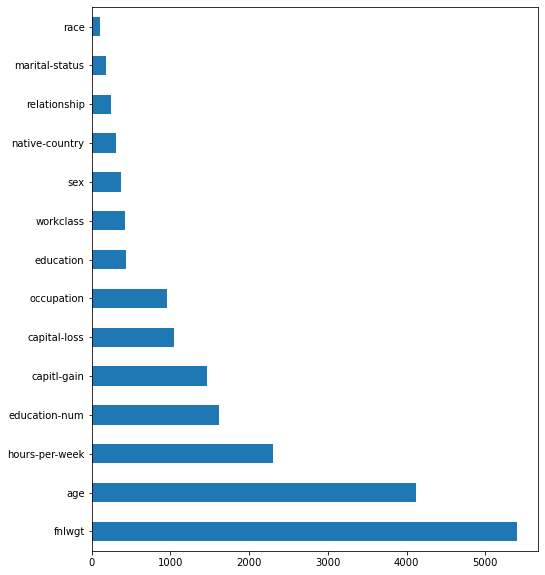

In [99]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))